<h1 style="font-family:'Georgia'; font-size:50px; color:#1e3a8a; text-align:center; font-weight:bold;">
📱 SOCIAL MEDIA ENGAGEMENT
</h1>


<div style="background:#020617; color:#38bdf8;
            font-family:'Courier New', monospace;
            font-weight:700; padding:14px; border-radius:12px;
            text-align:center; font-size:26px;">
&gt;&gt; IMPORT LIBRARIES,ALGORITHM AND METRICS
</div>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score
from tabulate import tabulate

<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    LOAD DATASET
</div>


In [2]:
df=pd.read_csv(r"C:\Users\tsiha\Downloads\social_media_engagement1.csv")

In [3]:
df

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    CHECKING SHAPE AND COLUMNS
</div>

In [4]:
df.shape

(100, 9)

In [5]:
df.columns

Index(['post_id', 'platform', 'post_type', 'post_time', 'likes', 'comments',
       'shares', 'post_day', 'sentiment_score'],
      dtype='object')

<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    MISSING VALUES CHECKING
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [7]:
df.describe(include = 'all')

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
count,100.000000,100,100,100,100.000000,100.00000,100.000000,100,100
unique,NaN,3,5,99,NaN,NaN,NaN,7,3
top,NaN,Instagram,carousel,5/2/2023 6:15,NaN,NaN,NaN,Wednesday,positive
freq,NaN,36,26,2,NaN,NaN,NaN,18,46
mean,50.500000,NaN,NaN,NaN,2381.810000,202.66000,415.650000,NaN,NaN
std,29.011492,NaN,NaN,NaN,1632.573284,138.84067,283.877601,NaN,NaN
min,1.000000,NaN,NaN,NaN,15.000000,10.00000,16.000000,NaN,NaN
25%,25.750000,NaN,NaN,NaN,895.750000,89.75000,183.000000,NaN,NaN
50%,50.500000,NaN,NaN,NaN,2220.000000,171.00000,356.500000,NaN,NaN
75%,75.250000,NaN,NaN,NaN,3593.250000,299.00000,689.500000,NaN,NaN


In [8]:
df.dtypes

post_id             int64
platform           object
post_type          object
post_time          object
likes               int64
comments            int64
shares              int64
post_day           object
sentiment_score    object
dtype: object

In [9]:
df.isnull().sum()

post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64

In [10]:
df=df.drop(['post_id','post_time'],axis=1)

In [11]:
df

,platform,post_type,likes,comments,shares,post_day,sentiment_score
0,Facebook,image,2121,474,628,Thursday,positive
1,Facebook,carousel,3660,432,694,Sunday,neutral
2,Instagram,poll,4955,408,688,Tuesday,negative
3,Twitter,image,1183,90,187,Thursday,negative
4,Twitter,video,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...
95,Instagram,carousel,36,294,911,Wednesday,positive
96,Twitter,video,314,108,458,Friday,neutral
97,Twitter,text,229,179,38,Saturday,positive
98,Instagram,poll,5000,500,204,Friday,positive


<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    ENCODING
</div>

In [12]:
le = LabelEncoder()

categorical_cols = ['platform', 'post_type', 'post_day', 'sentiment_score']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
df

,platform,post_type,likes,comments,shares,post_day,sentiment_score
0,0,1,2121,474,628,4,2
1,0,0,3660,432,694,3,1
2,1,2,4955,408,688,5,0
3,2,1,1183,90,187,4,0
4,2,4,3499,247,286,5,2
...,...,...,...,...,...,...,...
95,1,0,36,294,911,6,2
96,2,4,314,108,458,0,1
97,2,3,229,179,38,2,2
98,1,2,5000,500,204,0,2


In [14]:
dff=df.copy()
dff

,platform,post_type,likes,comments,shares,post_day,sentiment_score
0,0,1,2121,474,628,4,2
1,0,0,3660,432,694,3,1
2,1,2,4955,408,688,5,0
3,2,1,1183,90,187,4,0
4,2,4,3499,247,286,5,2
...,...,...,...,...,...,...,...
95,1,0,36,294,911,6,2
96,2,4,314,108,458,0,1
97,2,3,229,179,38,2,2
98,1,2,5000,500,204,0,2


In [15]:
df.columns


Index(['platform', 'post_type', 'likes', 'comments', 'shares', 'post_day',
       'sentiment_score'],
      dtype='object')

<div style="background:#020617; color:#1e3a8a; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            box-shadow:0 0 25px #2563eb;">
    SCALING
</div>


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


<div style="background:#020617; color:#3b82f6; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            text-shadow:0 0 10px #3b82f6, 0 0 20px #1d4ed8;">
KMEANS CLUSTERING
</div>

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

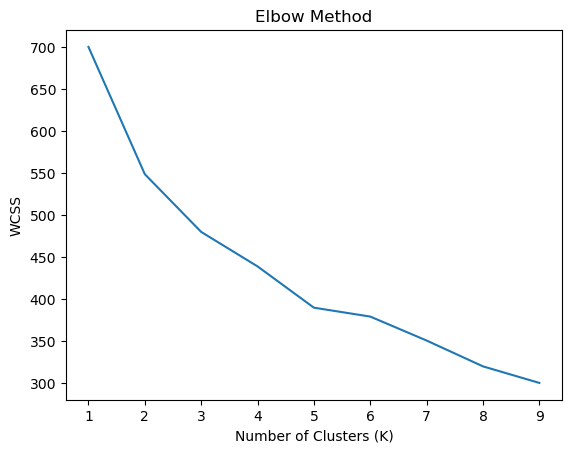

In [17]:
wcss = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure()
plt.plot(range(1, 10), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [18]:
type(X_scaled)

numpy.ndarray

In [19]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)#random initialization method
y_kmeans=kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
y_kmeans

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

In [21]:

score1 = silhouette_score(X_scaled, y_kmeans)

print("Silhouette Score:", score1)


Silhouette Score: 0.1911065726617119


<div style="background:#020617; color:#3b82f6; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            text-shadow:0 0 10px #3b82f6, 0 0 20px #1d4ed8;">
PCA
</div>

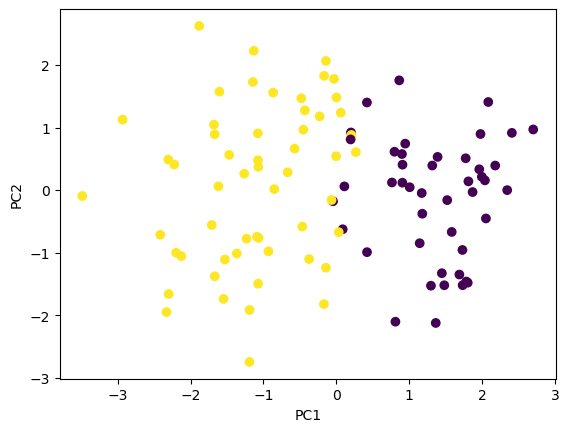

In [22]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.scatter(reduced[:,0], reduced[:,1], c=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

<div style="background:#020617; color:#3b82f6; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            text-shadow:0 0 10px #3b82f6, 0 0 20px #1d4ed8;">
DBSCAN CLUSTERING
</div>

In [23]:
epsilon = 0.8
min_samples = 15
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(reduced)

In [24]:
labels

array([-1, -1, -1,  0, -1, -1, -1,  0,  1, -1, -1, -1, -1,  0, -1, -1,  1,
        0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1,  1, -1,  0,
       -1, -1,  1,  0, -1, -1,  0, -1, -1,  1,  0,  1, -1, -1, -1,  1,  0,
       -1, -1, -1, -1, -1,  1,  1,  0, -1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1,  0,  0,  0, -1,  1,  1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1,  1, -1,  0,  0, -1,  1])

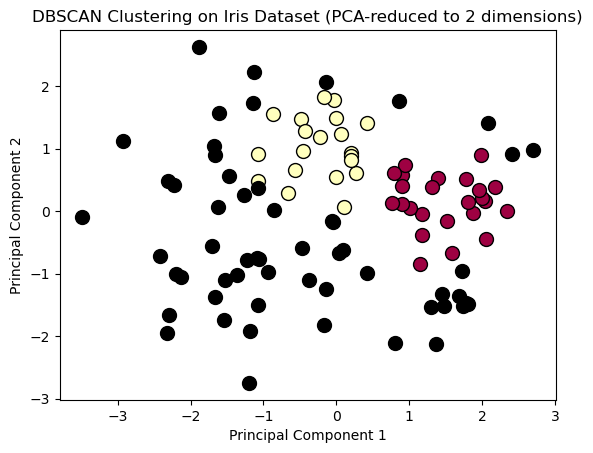

In [25]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)
    xy = reduced[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on Iris Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [26]:
unique_labels

{np.int64(-1), np.int64(0), np.int64(1)}

In [27]:
score2 = silhouette_score(reduced, labels)

print("Silhouette Score:", score2)

Silhouette Score: 0.15586605704012815


<div style="background:#020617; color:#3b82f6; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            text-shadow:0 0 10px #3b82f6, 0 0 20px #1d4ed8;">
 HEIRARCHICAL CLUSTERING
</div>

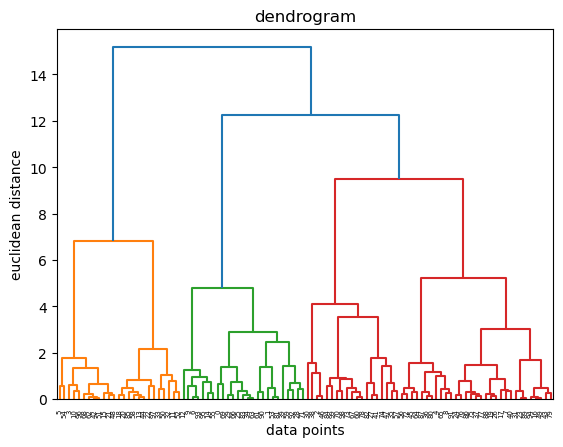

In [28]:
dendrogram=sch.dendrogram(sch.linkage(reduced,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

<div style="background:#020617; color:#3b82f6; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            text-shadow:0 0 10px #3b82f6, 0 0 20px #1d4ed8;">
AGGLOMERATIVE CLUSTERING
</div>

In [29]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')

y_ahc=ahc.fit_predict(reduced)

In [30]:
y_ahc

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [31]:
score3=silhouette_score(reduced,y_ahc)
score3

np.float64(0.32396102184983716)

<div style="background:#020617; color:#3b82f6; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            text-shadow:0 0 10px #3b82f6, 0 0 20px #1d4ed8;">
FUZZY CLUSTERING
</div>

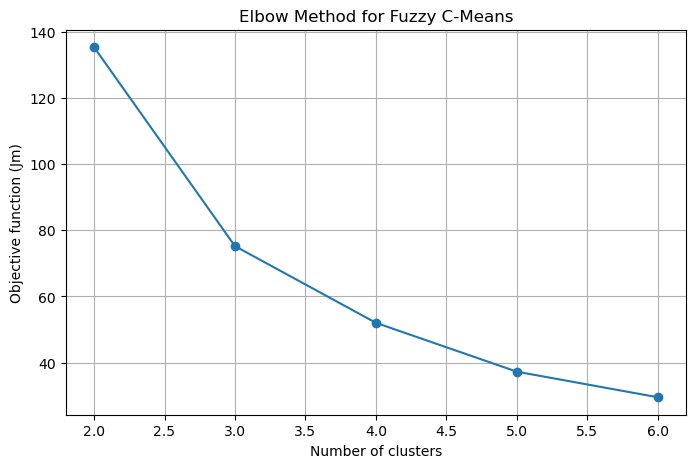

In [34]:
data = reduced.T
cluster_range = range(2, 7)

jm_values = []

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=data,
        c=c,
        m=2.0,            # fuzziness coefficient
        error=0.005,
        maxiter=1000,
        init=None
    )
    jm_values.append(jm[-1])  
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, jm_values, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Objective function (Jm)")
plt.title("Elbow Method for Fuzzy C-Means")
plt.grid(True)
plt.show()


In [35]:
n_clusters = 3

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=data,
    c=n_clusters,
    m=2,
    error=0.005,
    maxiter=1000
)

In [36]:
hard_clusters = np.argmax(u, axis=0)

In [37]:
score4=silhouette_score(reduced,hard_clusters)
print(score4)

0.41979301911946615


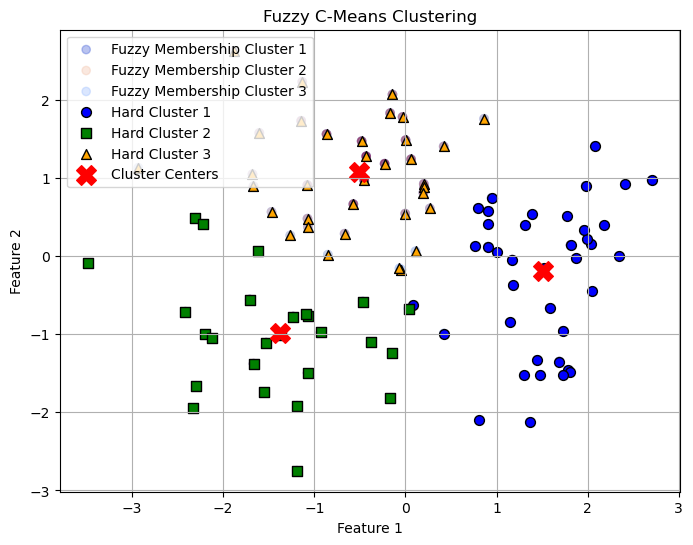

In [38]:

# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Fuzzy membership visualization
for i in range(n_clusters):
    ax.scatter(
        reduced[:, 0],
        reduced[:, 1],
        c=u[i],
        cmap='coolwarm',
        alpha=0.4,
        label=f'Fuzzy Membership Cluster {i+1}'
    )

# Hard clusters
markers = ['o', 's', '^']
colors = ['blue', 'green', 'orange']

for i in range(n_clusters):
    cluster_points = reduced[hard_clusters == i]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        c=colors[i],
        marker=markers[i],
        edgecolor='k',
        s=50,
        label=f'Hard Cluster {i+1}'
    )

# Cluster centers
ax.scatter(
    cntr[:, 0],
    cntr[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

<div style="background:#020617; color:#3b82f6; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            text-shadow:0 0 10px #3b82f6, 0 0 20px #1d4ed8;">
TABLE
</div>

In [39]:
table = [
    ['Clustering Method', 'Silhouette Score'],
    ['KMeans', score1],
    ['DBSCAN', score2],
    ['Agglomerative', score3],
    ['Fuzzy C-Means', score4],
   
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤════════════════════╕
│ Clustering Method   │   Silhouette Score │
╞═════════════════════╪════════════════════╡
│ KMeans              │           0.191107 │
├─────────────────────┼────────────────────┤
│ DBSCAN              │           0.155866 │
├─────────────────────┼────────────────────┤
│ Agglomerative       │           0.323961 │
├─────────────────────┼────────────────────┤
│ Fuzzy C-Means       │           0.419793 │
╘═════════════════════╧════════════════════╛


In [40]:
y_kmeans

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

<div style="background:#020617; color:#3b82f6; font-weight:800;
            padding:18px; border-radius:18px; text-align:center;
            font-size:30px;
            text-shadow:0 0 10px #3b82f6, 0 0 20px #1d4ed8;">
📊 Conclusion Report (Cluster-wise Comparison)
</div>

In [41]:
df['Fuzzy_cluster']=hard_clusters
cluster1=df.groupby('Fuzzy_cluster')[['platform', 'post_type', 'likes', 'comments', 'shares', 'post_day','sentiment_score']].mean().round(2)
cluster1['Count']=df['Fuzzy_cluster'].value_counts()
print("Social Media Segmentation Cluster Summary (KMeans):")
print(cluster1)
           


Social Media Segmentation Cluster Summary (KMeans):
               platform  post_type    likes  comments  shares  post_day  \
Fuzzy_cluster                                                             
0                  1.77       2.00  1348.26    112.21  248.08      2.72   
1                  0.38       0.58  2527.69    283.77  663.12      2.50   
2                  0.60       3.00  3425.11    243.20  418.54      4.26   

               sentiment_score  Count  
Fuzzy_cluster                          
0                         1.54     39  
1                         0.58     26  
2                         1.26     35  


| Cluster | Key Metrics (avg)                       | Sentiment | Count | Insights                                                                            |
| ------- | --------------------------------------- | --------- | ----- | ----------------------------------------------------------------------------------- |
| 0       | Likes: 1348, Comments: 112, Shares: 248 | 1.54      | 39    | Moderate engagement, most positive sentiment; good for brand image.                 |
| 1       | Likes: 2528, Comments: 284, Shares: 663 | 0.58      | 26    | High engagement & virality, lower sentiment; ideal for viral campaigns.             |
| 2       | Likes: 3425, Comments: 243, Shares: 419 | 1.26      | 35    | Highest likes, consistent interaction; effective for promotions and visual content. |
